# Extensión del análisis de entrevistas: múltiples archivos y exportación .csv

Este notebook permite:
- Procesar múltiples archivos `.txt` de entrevistas
- Analizar frecuencias de palabras
- Exportar los resultados a `.csv` por entrevista
- Generar una tabla comparativa final

## 1. Instalar e importar librerías necesarias

In [ ]:
!pip install -q nltk
import nltk
import os
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_esp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2. Subir múltiples archivos `.txt`

In [ ]:
from google.colab import files
uploaded = files.upload()
txt_files = [f for f in uploaded if f.endswith('.txt')]

Saving Voz 035.txt to Voz 035.txt
Saving Voz 036.txt to Voz 036.txt
Saving Voz_Prueba_Piloto_01.txt to Voz_Prueba_Piloto_01.txt


## 3. Procesar cada archivo y guardar frecuencias en `.csv`

In [ ]:
resultados = []

for archivo in txt_files:
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()

    palabras = re.findall(r'\b\w+\b', texto.lower())
    tokens = [p for p in palabras if p not in stopwords_esp]
    frecuencias = Counter(tokens)

    df = pd.DataFrame(frecuencias.items(), columns=['palabra', 'frecuencia'])
    df['archivo'] = archivo
    resultados.append(df)

    # Guardar CSV individual
    nombre_csv = archivo.replace('.txt', '_frecuencias.csv')
    df.to_csv(nombre_csv, index=False)
    print(f"Frecuencias guardadas en: {nombre_csv}")

Frecuencias guardadas en: Voz 035_frecuencias.csv
Frecuencias guardadas en: Voz 036_frecuencias.csv
Frecuencias guardadas en: Voz_Prueba_Piloto_01_frecuencias.csv


## 4. Unir todos los resultados en una sola tabla

In [ ]:
tabla_general = pd.concat(resultados, ignore_index=True)
tabla_general.head()

,palabra,frecuencia,archivo
0,primera,1,Voz 035.txt
1,entrevista,1,Voz 035.txt
2,acto,1,Voz 035.txt
3,directivo,1,Voz 035.txt
4,aérete,2,Voz 035.txt


## 5. Guardar matriz comparativa completa

In [ ]:
tabla_general.to_csv("frecuencias_todas_entrevistas.csv", index=False)
print("Archivo generado: frecuencias_todas_entrevistas.csv")

Archivo generado: frecuencias_todas_entrevistas.csv


## 6. Visualización rápida (top 10 por entrevista)

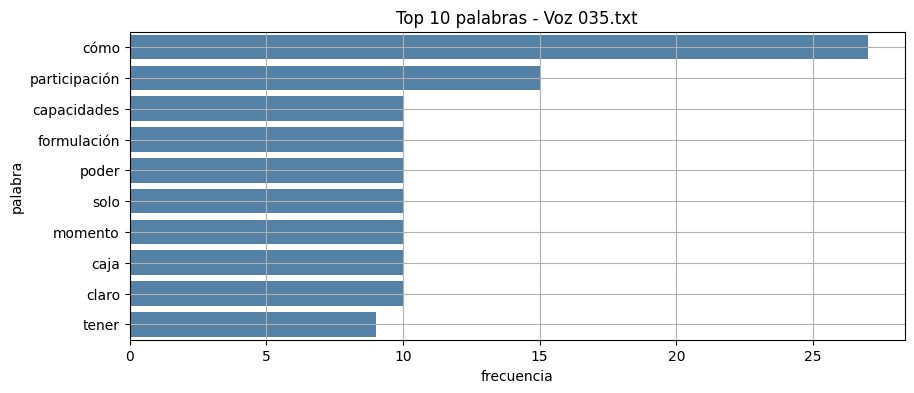

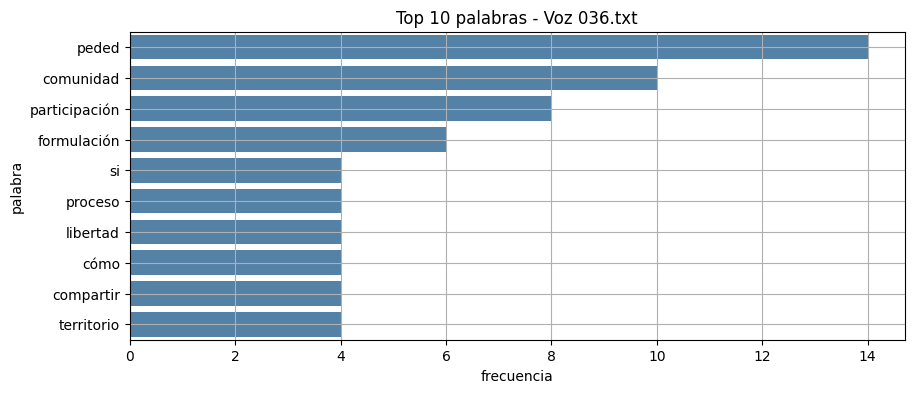

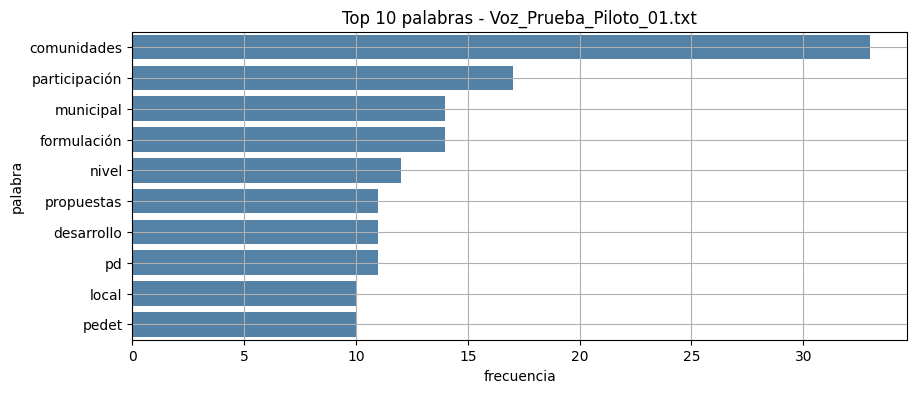

In [ ]:
import seaborn as sns

for archivo in txt_files:
    df = tabla_general[tabla_general['archivo'] == archivo].nlargest(10, 'frecuencia')
    plt.figure(figsize=(10,4))
    sns.barplot(x='frecuencia', y='palabra', data=df, color='steelblue')
    plt.title(f"Top 10 palabras - {archivo}")
    plt.grid(True)
    plt.show()

## 7. Conclusión

Este notebook permite procesar múltiples entrevistas, extraer vocabulario clave y construir una base de datos para análisis comparativo posterior.